In [4]:
import os
import numpy as np
import pandas as pd
import re
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sms

os.chdir('.')
###os.listdir()
ASRD = pd.read_csv('AllSharedRewardData.csv')
SubnMood = pd.read_csv('Substance_and_Mood_data_SCORED.csv')

totalscores = ['sub','score_susd_mania','score_susd_depress', 'audit_total_score','dudit_total_score']
keepcolumns = [col for col in SubnMood.columns if col.startswith('aadis_')]
keepcolumns = totalscores + keepcolumns
ASRD = pd.merge(ASRD, SubnMood[keepcolumns], on = 'sub', how = 'right')

ASRD.tail()

,Unnamed: 0,sub,gender,SPSRWD,BISBAS_BAS,PC1,Win-Friend,Win-Stranger,Win-Comp,Lose-Friend,...,aadis_q4,aadis_q5,aadis_q6,aadis_q7,aadis_q8,aadis_q9,aadis_q10,aadis_q11,aadis_q12,aadis_q13
83,NaN,3204,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84,85.0,3206,2.0,12.0,36.0,-2.510051,2.0,-3.0,1.0,-4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
85,86.0,3210,2.0,14.0,41.0,2.652562,4.0,-5.0,-5.0,-5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
86,87.0,3212,1.0,7.0,36.0,-5.611066,3.0,0.0,-2.0,-5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
87,NaN,3213,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,sub
gender,
1.0,34
2.0,14


,PC1,closeness_rating
gender,,
1.0,-0.237839,4.636364
2.0,-0.012908,4.923077


(array([ 6.,  6.,  7.,  6., 10.,  3.,  4.,  1.,  0.,  1.]),
 array([18.18517834, 18.99476603, 19.80435373, 20.61394142, 21.42352912,
        22.23311681, 23.0427045 , 23.8522922 , 24.66187989, 25.47146759,
        26.28105528]),
 <BarContainer object of 10 artists>)

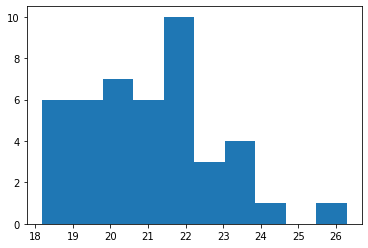

In [2]:
female = ASRD.query('gender == "1"')['PC1']
male = ASRD.query('gender == "2"')['PC1']
#ASRD['closeness_rating'].max()
display(ASRD[['sub','gender']].groupby('gender').count(),
       ASRD[['PC1','closeness_rating','gender']].groupby('gender').mean())

plt.hist(ASRD[['screen_age']])

In [5]:
PC1 = ASRD[ASRD['gender']==2]['PC1']
IOS = ASRD[ASRD['gender']==2]['closeness_rating']
analysis = stats.pearsonr(PC1, IOS)
display(analysis)

PC1 = ASRD[ASRD['gender']==1]['PC1']
IOS = ASRD[ASRD['gender']==1]['closeness_rating']
analysis = stats.pearsonr(PC1, IOS)
display(analysis)

(0.27154207412315334, 0.4192493734716171)

(-0.1443111488076083, 0.43069321987691367)

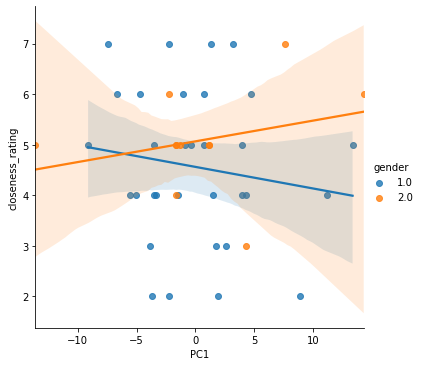

In [6]:
g=sms.lmplot(x='PC1',y='closeness_rating', data=ASRD, hue='gender')

,sub,gender,SPSRWD,BISBAS_BAS,PC1,Win-Friend,Win-Stranger,Win-Comp,Lose-Friend,Lose-Stranger,...,aadis_q8,aadis_q9,aadis_q10,aadis_q11,aadis_q12,aadis_q13,Win-Diff-C,Lose-Diff-C,Win-Diff-S,Lose-Diff-S
sub,1.000000,-0.005564,0.169497,0.233472,0.223672,0.356683,-0.010430,-0.124002,-0.262166,-0.167469,...,NaN,NaN,NaN,NaN,0.064782,NaN,0.308295,-0.351553,0.265604,-0.124536
gender,-0.005564,1.000000,0.181787,-0.040349,0.047060,-0.143116,-0.066940,-0.282163,-0.116171,-0.208860,...,NaN,NaN,NaN,NaN,-0.140859,NaN,0.173288,0.127197,-0.038667,0.038149
SPSRWD,0.169497,0.181787,1.000000,0.733777,0.892735,0.201204,-0.011322,-0.356878,-0.212487,-0.176270,...,NaN,NaN,NaN,NaN,0.037013,NaN,0.430642,-0.154322,0.155018,-0.072839
BISBAS_BAS,0.233472,-0.040349,0.733777,1.000000,0.961190,0.307008,-0.159674,-0.252094,-0.031227,-0.187278,...,NaN,NaN,NaN,NaN,-0.035747,NaN,0.395424,-0.140940,0.372485,0.101152
PC1,0.223672,0.047060,0.892735,0.961190,1.000000,0.285318,-0.110496,-0.312114,-0.106997,-0.195786,...,NaN,NaN,NaN,NaN,-0.009277,NaN,0.437127,-0.156141,0.309988,0.037507
Win-Friend,0.356683,-0.143116,0.201204,0.307008,0.285318,1.000000,0.310679,0.107782,-0.339715,-0.173264,...,NaN,NaN,NaN,NaN,-0.018159,NaN,0.456832,-0.314645,0.420124,-0.191694
Win-Stranger,-0.010430,-0.066940,-0.011322,-0.159674,-0.110496,0.310679,1.000000,0.256600,-0.239735,-0.346075,...,NaN,NaN,NaN,NaN,-0.156434,NaN,-0.057707,-0.071074,-0.732037,0.019853
Win-Comp,-0.124002,-0.282163,-0.356878,-0.252094,-0.312114,0.107782,0.256600,1.000000,0.026855,0.064443,...,NaN,NaN,NaN,NaN,0.028444,NaN,-0.835132,-0.062076,-0.167728,-0.020021
Lose-Friend,-0.262166,-0.116171,-0.212487,-0.031227,-0.106997,-0.339715,-0.239735,0.026855,1.000000,0.253729,...,NaN,NaN,NaN,NaN,-0.192791,NaN,-0.211984,0.651709,-0.014607,0.741934
Lose-Stranger,-0.167469,-0.208860,-0.176270,-0.187278,-0.195786,-0.173264,-0.346075,0.064443,0.253729,1.000000,...,NaN,NaN,NaN,NaN,-0.074748,NaN,-0.153524,-0.232396,0.206217,-0.460282


<AxesSubplot:>

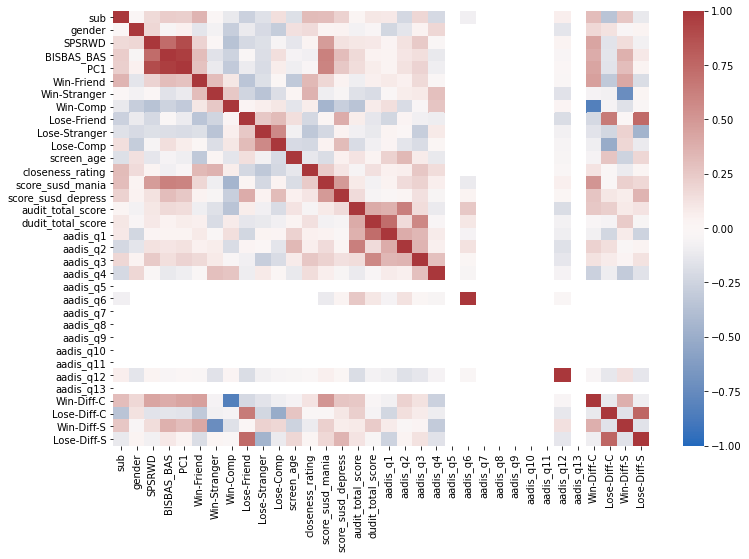

In [7]:
ASRD['Win-Diff-C'] = ASRD['Win-Friend'] - ASRD['Win-Comp']
ASRD['Lose-Diff-C'] = ASRD['Lose-Friend'] - ASRD['Lose-Comp']

ASRD['Win-Diff-S'] = ASRD['Win-Friend'] - ASRD['Win-Stranger']
ASRD['Lose-Diff-S'] = ASRD['Lose-Friend'] - ASRD['Lose-Stranger']

ASRD.to_csv('FullSharedRewardData.csv', index = False)


cormat=ASRD.corr()
display(cormat)
fig = plt.figure(figsize=(12, 8))
sms.heatmap(cormat,cmap='vlag',vmin=-1)

In [31]:
ASRD_RS = ASRD.dropna(subset=['PC1'])
r,p = stats.pearsonr(ASRD_RS['Win-Friend'], ASRD_RS['PC1'])
print("Win-Friend & RS PCA  -  r: %s ; p: %s" %(r,p))
r,p = stats.pearsonr(ASRD_RS['Win-Stranger'], ASRD_RS['PC1'])
print("Win-Stranger & RS PCA  -  r: %s ; p: %s" %(r,p))
r,p = stats.pearsonr(ASRD_RS['Win-Comp'], ASRD_RS['PC1'])
print("Win-Comp & RS PCA  -  r: %s ; p: %s" %(r,p))
r,p = stats.pearsonr(ASRD_RS['Lose-Friend'], ASRD_RS['PC1'])
print("Lose-Friend & RS PCA  -  r: %s ; p: %s" %(r,p))
r,p = stats.pearsonr(ASRD_RS['Lose-Stranger'], ASRD_RS['PC1'])
print("Lose-Stranger & RS PCA  -  r: %s ; p: %s" %(r,p))
r,p = stats.pearsonr(ASRD_RS['Lose-Comp'], ASRD_RS['PC1'])
print("Lose-Comp & RS PCA  -  r: %s ; p: %s" %(r,p))

r,p = stats.pearsonr(ASRD_RS['Win-Friend'], ASRD_RS['closeness_rating'])
print("Win-Friend & closeness rating  -  r: %s ; p: %s" %(r,p))
r,p = stats.pearsonr(ASRD_RS['Win-Stranger'], ASRD_RS['closeness_rating'])
print("Win-Stranger & closeness rating  -  r: %s ; p: %s" %(r,p))
r,p = stats.pearsonr(ASRD_RS['Lose-Friend'], ASRD_RS['closeness_rating'])
print("Lose-Friend & closeness rating  -  r: %s ; p: %s" %(r,p))
r,p = stats.pearsonr(ASRD_RS['Lose-Stranger'], ASRD_RS['closeness_rating'])
print("Lose-Stranger & closeness rating  -  r: %s ; p: %s" %(r,p))
r,p = stats.pearsonr(ASRD_RS['Win-Comp'], ASRD_RS['SPSRWD'])
print("Win-Comp & SPSRWD  -  r: %s ; p: %s" %(r,p))
r,p = stats.pearsonr(ASRD_RS['Win-Comp'], ASRD_RS['audit_total_score'])
print("Win-Comp & alcohol usage  -  r: %s ; p: %s" %(r,p))
r,p = stats.pearsonr(ASRD_RS['Win-Diff-C'], ASRD_RS['PC1'])
print("Win-Diff & RS PCA  -  r: %s ; p: %s" %(r,p))
r,p = stats.pearsonr(ASRD_RS['Lose-Diff-C'], ASRD_RS['PC1'])
print("Lose-Diff & RS PCA  -  r: %s ; p: %s" %(r,p))
r,p = stats.pearsonr(ASRD_RS['gender'], ASRD_RS['PC1'])
print("Gender & RS PCA  -  r: %s ; p: %s" %(r,p))
r,p = stats.pearsonr(ASRD_RS['dudit_total_score'], ASRD_RS['audit_total_score'])
print("Drug & alcohol usage  -  r: %s ; p: %s" %(r,p))

Win-Friend & RS PCA  -  r: 0.25452101044779674 ; p: 0.15288941988787874
Win-Stranger & RS PCA  -  r: -0.12957003880968157 ; p: 0.4723495463464446
Win-Comp & RS PCA  -  r: -0.3120846173624599 ; p: 0.07704025988726591
Lose-Friend & RS PCA  -  r: -0.11690635242472668 ; p: 0.5170441352791892
Lose-Stranger & RS PCA  -  r: -0.3354785086292149 ; p: 0.056314397145997126
Lose-Comp & RS PCA  -  r: 0.029078585594176504 ; p: 0.8723796432771711
Win-Friend & closeness rating  -  r: 0.3887144210071207 ; p: 0.02537557113365415
Win-Stranger & closeness rating  -  r: 0.48272663332409516 ; p: 0.0044370457734244405
Lose-Friend & closeness rating  -  r: -0.22980705153194214 ; p: 0.19825523106946383
Lose-Stranger & closeness rating  -  r: -0.4159280913130793 ; p: 0.016066043738811975
Win-Comp & SPSRWD  -  r: -0.29951782063639987 ; p: 0.0903828510274291
Win-Comp & alcohol usage  -  r: -0.3241827063181498 ; p: 0.06568854723660948
Win-Diff & RS PCA  -  r: 0.43915952851740836 ; p: 0.010561165108440872
Lose-Diff

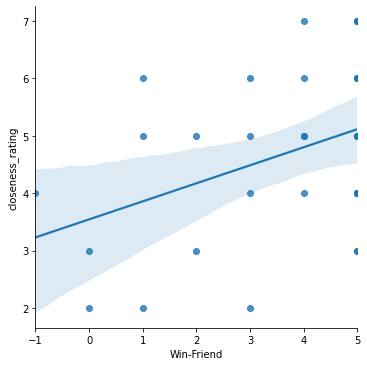

<class 'seaborn.axisgrid.FacetGrid'>


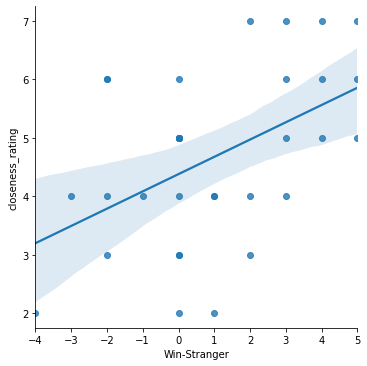

<class 'seaborn.axisgrid.FacetGrid'>


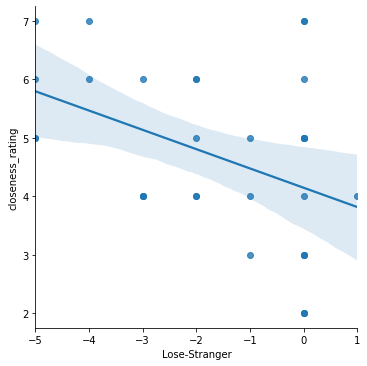

<class 'seaborn.axisgrid.FacetGrid'>


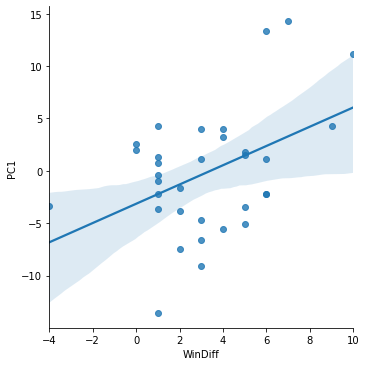

<class 'seaborn.axisgrid.FacetGrid'>


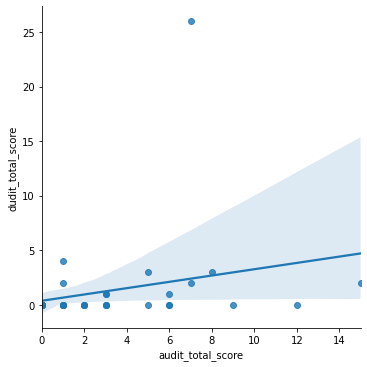

<class 'seaborn.axisgrid.FacetGrid'>


In [34]:
g=sms.lmplot(x='Win-Friend',y='closeness_rating',data=ASRD)
plt.show()
print(type(g))

g=sms.lmplot(x='Win-Stranger',y='closeness_rating',data=ASRD)
plt.show()
print(type(g))

g=sms.lmplot(x='Lose-Stranger',y='closeness_rating',data=ASRD)
plt.show()
print(type(g))

g=sms.lmplot(x='Win-Diff-C',y='PC1',data=ASRD)
plt.show()
print(type(g))

g=sms.lmplot(x='audit_total_score',y='dudit_total_score',data=ASRD)
plt.show()
print(type(g))

In [42]:
ASRD_SUSD = ASRD.dropna(subset=['score_susd_mania'])

r,p = stats.pearsonr(ASRD_SUSD['PC1'], ASRD_SUSD['score_susd_mania'])
print("RS PCA & Mania  -  r: %s ; p: %s" %(r,p))
r,p = stats.pearsonr(ASRD_SUSD['Win-Diff-C'], ASRD_SUSD['score_susd_mania'])
print("Win-Diff & Mania  -  r: %s ; p: %s" %(r,p))
r,p = stats.pearsonr(ASRD_SUSD['Lose-Diff-C'], ASRD_SUSD['score_susd_depress'])
print("Lose-Diff & Mania  -  r: %s ; p: %s" %(r,p))
r,p = stats.pearsonr(ASRD_SUSD['Win-Comp'], ASRD_SUSD['score_susd_mania'])
print("Win-Comp & Mania  -  r: %s ; p: %s" %(r,p))
r,p = stats.pearsonr(ASRD_SUSD['Win-Comp'], ASRD_SUSD['score_susd_depress'])
print("Win-Comp & Depression  -  r: %s ; p: %s" %(r,p))
r,p = stats.pearsonr(ASRD_SUSD['Lose-Comp'], ASRD_SUSD['score_susd_depress'])
print("Lose-Comp & Depression  -  r: %s ; p: %s" %(r,p))
r,p = stats.pearsonr(ASRD_SUSD['Lose-Friend'], ASRD_SUSD['score_susd_depress'])
print("Lose-Friend & Depression  -  r: %s ; p: %s" %(r,p))
r,p = stats.pearsonr(ASRD_SUSD['score_susd_mania'], ASRD_SUSD['score_susd_depress'])
print("Mania & Depression  -  r: %s ; p: %s" %(r,p))

r,p = stats.pearsonr(ASRD_SUSD['Win-Friend'], ASRD_SUSD['screen_age'])
print("Win-Friend & Age  -  r: %s ; p: %s" %(r,p))

RS PCA & Mania  -  r: 0.6099468541587958 ; p: 0.00016422504490604448
Win-Diff & Mania  -  r: 0.5322148508861643 ; p: 0.001432524595629355
Lose-Diff & Mania  -  r: -0.0007771926834386246 ; p: 0.9965751104077073
Win-Comp & Mania  -  r: -0.4716431274430237 ; p: 0.005591111035978053
Win-Comp & Depression  -  r: -0.4904679867844841 ; p: 0.003758332438967263
Lose-Comp & Depression  -  r: 0.11031593814415312 ; p: 0.5410991608168978
Lose-Friend & Depression  -  r: 0.1041257515256658 ; p: 0.5641663249440101
Mania & Depression  -  r: 0.5291956215000166 ; p: 0.0015424174843782922
Win-Friend & Age  -  r: -0.4808996179763858 ; p: 0.004611803117446358


In [39]:
ASRD_age = ASRD.dropna(subset=['screen_age'])
r,p = stats.pearsonr(ASRD_age['Lose-Diff-C'], ASRD_age['screen_age'])
print("Lose-Diff & Age  -  r: %s ; p: %s" %(r,p))
r,p = stats.pearsonr(ASRD_age['PC1'], ASRD_age['screen_age'])
print("RS PCA & Age  -  r: %s ; p: %s" %(r,p))

Lose-Diff & Age  -  r: 0.3277376131035558 ; p: 0.06261530801230501
RS PCA & Age  -  r: -0.28942380478562063 ; p: 0.10232492416300643


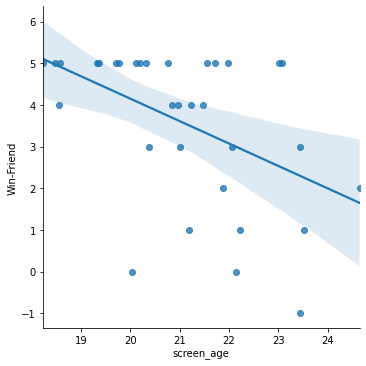

<class 'seaborn.axisgrid.FacetGrid'>


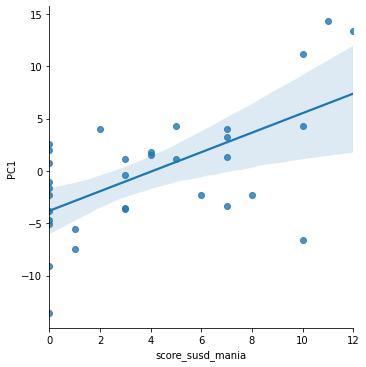

<class 'seaborn.axisgrid.FacetGrid'>


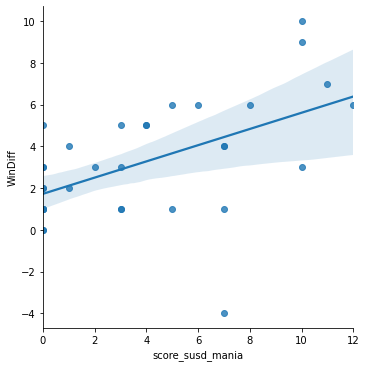

<class 'seaborn.axisgrid.FacetGrid'>


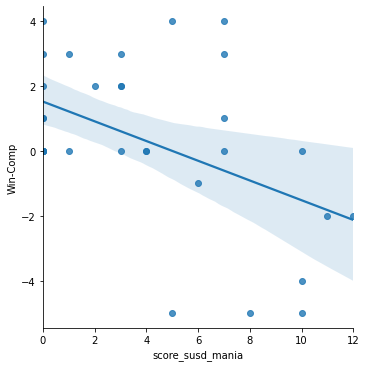

<class 'seaborn.axisgrid.FacetGrid'>


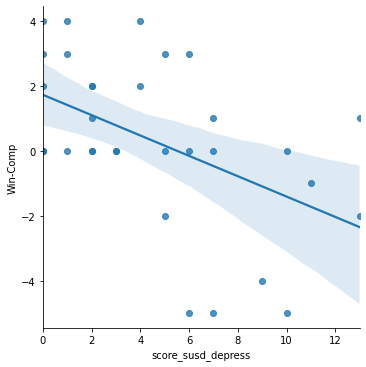

<class 'seaborn.axisgrid.FacetGrid'>


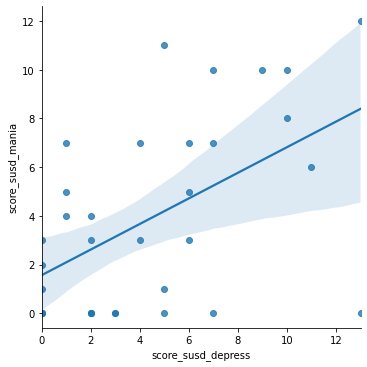

<class 'seaborn.axisgrid.FacetGrid'>


In [46]:
g=sms.lmplot(x='screen_age',y='Win-Friend',data=ASRD)
plt.show()
print(type(g))

g=sms.lmplot(x='score_susd_mania',y='PC1',data=ASRD)
plt.show()
print(type(g))

g=sms.lmplot(x='score_susd_mania',y='Win-Diff-C',data=ASRD)
plt.show()
print(type(g))

g=sms.lmplot(x='score_susd_mania',y='Win-Comp',data=ASRD)
plt.show()
print(type(g))
g=sms.lmplot(x='score_susd_depress',y='Win-Comp',data=ASRD)
plt.show()
print(type(g))

g=sms.lmplot(x='score_susd_depress',y='score_susd_mania',data=ASRD)
plt.show()
print(type(g))